In [4]:
# Disable warnings in Anaconda
import warnings

import numpy as np
from scipy.interpolate import interp1d

warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
import sklearn

In [5]:
# Load data
df = pd.read_csv("./data/dataset_parameters.csv", delimiter=" ")
fixtures = ["washbasin", "shower", "kitchenfaucet"]
# Choose the numeric features
df = df[["sec_from_midnight","liters","fixture", "num_fixture"]]
df = df[(df["fixture"]==fixtures[0]) | (df["fixture"]==fixtures[1]) | (df["fixture"]==fixtures[2])]
df.head()
df = sklearn.utils.shuffle(df)
X = np.asarray(df[["sec_from_midnight","liters"]],dtype=float)
max_dur = max(X[:,0])
max_lit = max(X[:,1])
# X[:,0] = X[:,0] /max_dur
# X[:,1] = X[:,1]/max_lit
X[:,0] = X[:,0] /3600
X[:,1] = X[:,1]/1000
# print(X)
Y = df["num_fixture"]-2

X_train_circles, X_test_circles, y_train_circles, y_test_circles = \
    train_test_split(X, Y, test_size=0.2)

No handles with labels found to put in legend.


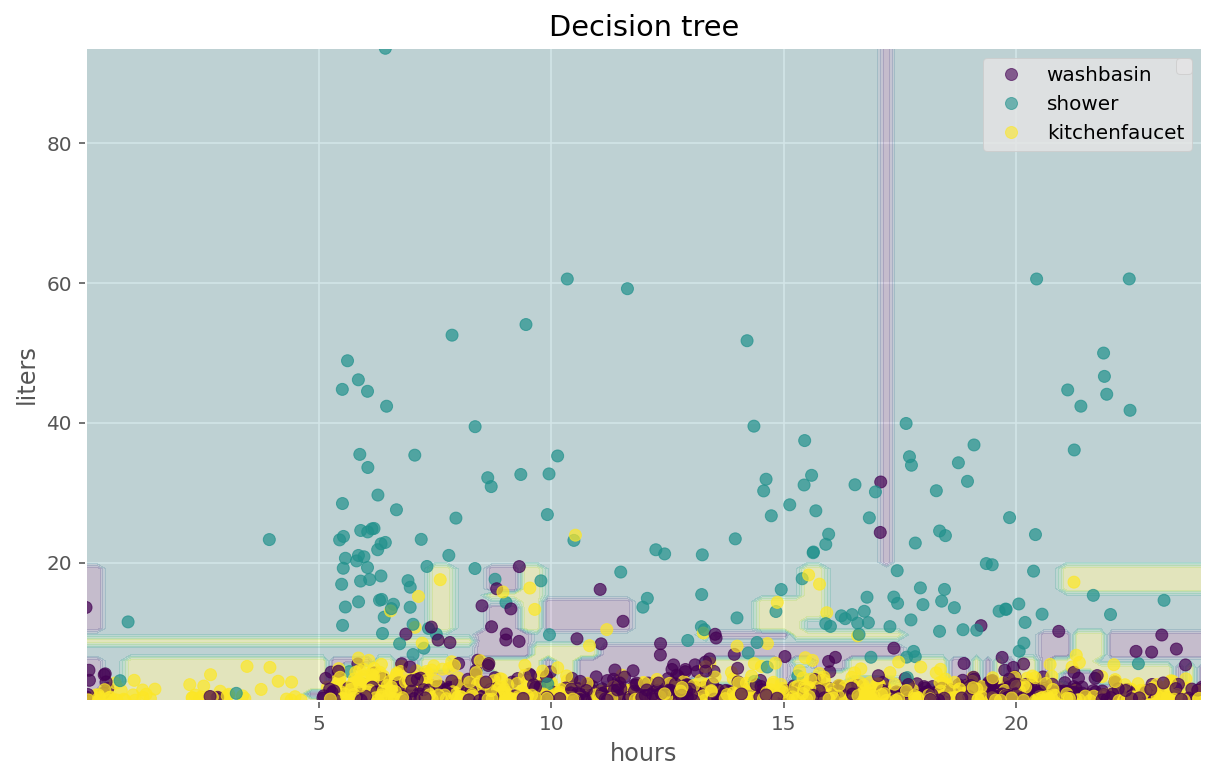

In [6]:
x_range = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx1, xx2 = np.meshgrid(x_range, y_range)


def plot_class(title):
    fig, ax = plt.subplots()
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    scatter = ax.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend2 = ax.legend(handles, fixtures, loc="upper right")
    ax.add_artist(legend2)
    plt.title(title)
    ax.legend()
    ax.set_xlabel("hours")
    ax.set_ylabel("liters")
    plt.show()


dtree = DecisionTreeClassifier()
dtree.fit(X_train_circles, y_train_circles)


y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plot_class("Decision tree")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


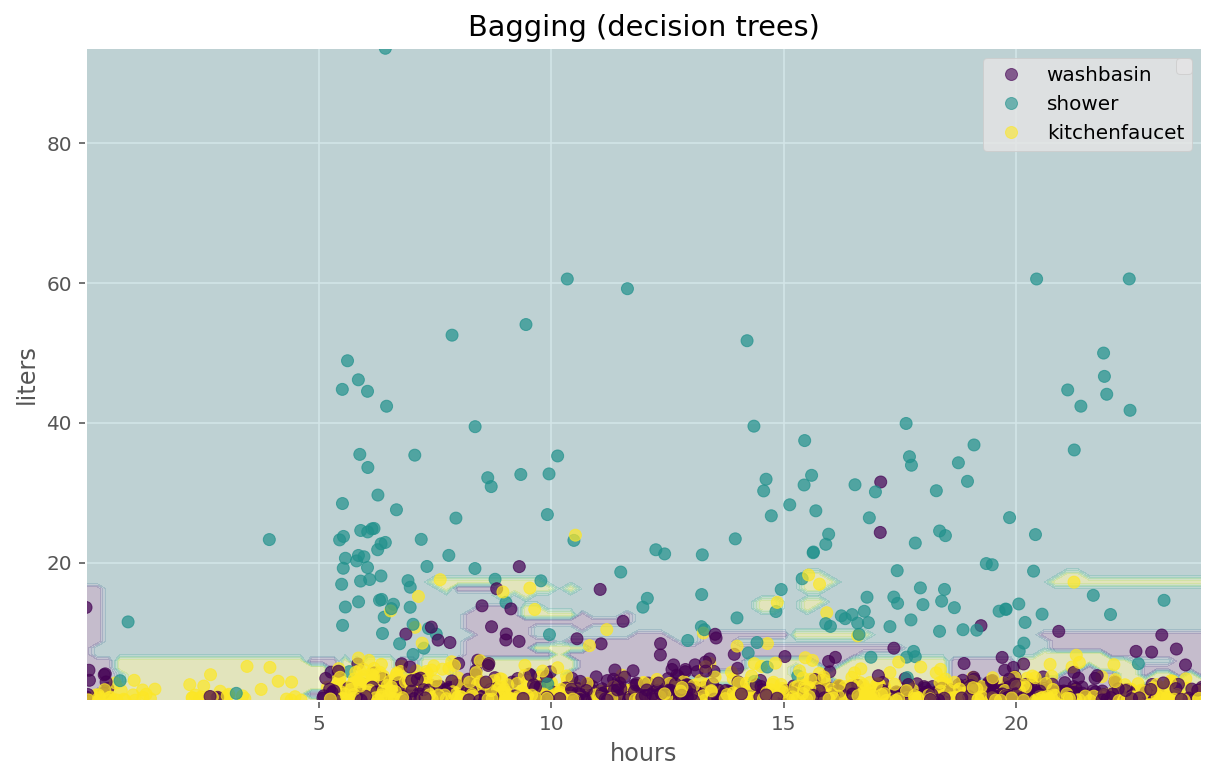

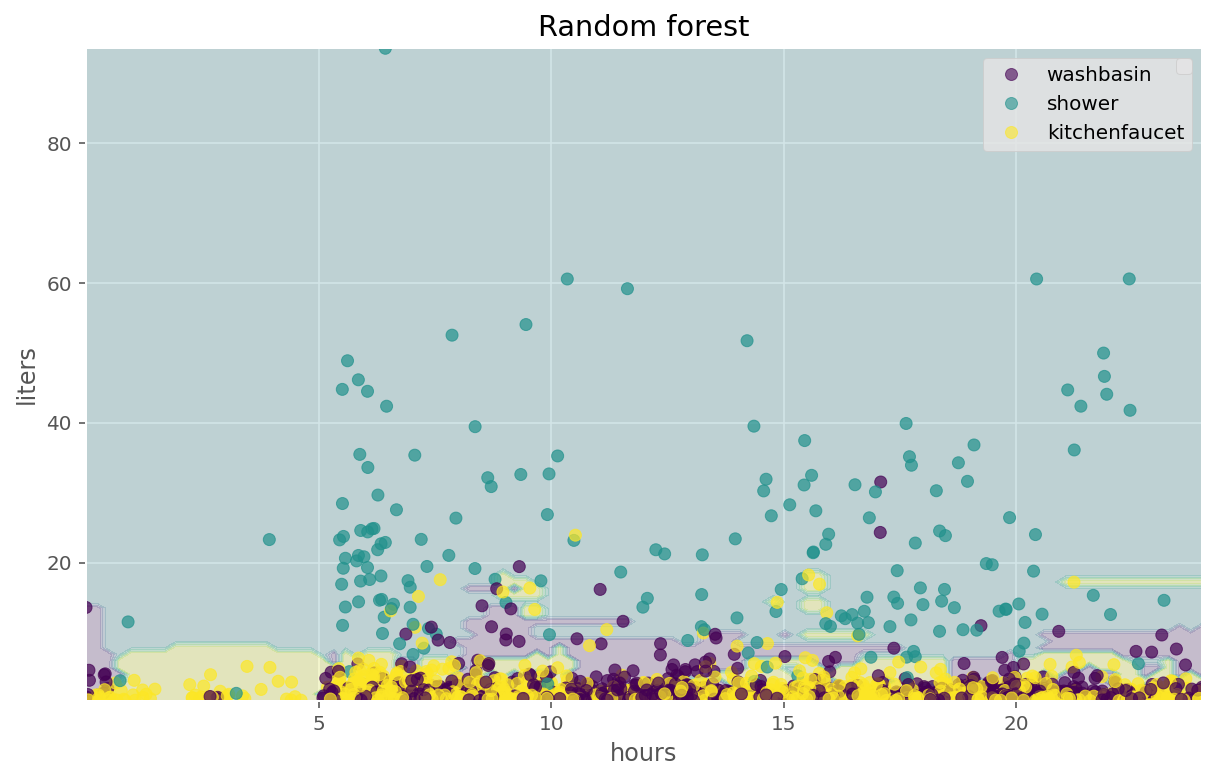

In [7]:
b_dtree = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plot_class("Bagging (decision trees)")


rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plot_class("Random forest")